# INTRODUCTION
- Observing forest fire in 2 regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of algeria.
- The dataset I'm using comes from UCI on Algerian Forest Fires
--- https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

- The dataset contains record forest fire occurrence in summer 2012 which spans the period from June 2012 to September 2012.
- This project requires the possibility of using machine learning algorithm to predict forest fires in these regions. This is because machine learning can analyse amount of data. Such as, weather patterns, temperature changes and other environmental factors. This can be used to predict when and where a future forest fire might occur using the patterns detected by the machine learning algorithm in these regions.

## Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attributes and 1 output attribute (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.


## Attribute Information:

1. Date: (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp: temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH: Relative Humidity in %: 21 to 90
4. Ws:Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes

## Steps
- Data gathering
- Exploratory Data Analysis (EDA)
- Feature Selection
- Model Building & Selection
- Hyperparameter Tuning
- Model deployment

In [1]:
import warnings
warnings.filterwarnings("ignore")

##### Importing python libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
#import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
#from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
import bz2,pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

#### Loading CSV fire
- Pandas Library: to download the forest dataset

###### Variable declaration:
- ff_df is forestFire_dataframe

In [3]:
ff_df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
ff_df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


# EDA
- Exploratory Data Analysis (EDA) application to extract insights from the data set by performing Data Analysis using Pandas and Data visualisation using Matplotlib & Seaborn to know which features have contributed more in predicting Forest fire. As it is a good practice to study and understand the data first and gather as many insight as possible.

In [4]:
ff_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
ff_df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [6]:
ff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      245 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


To allow regression analysis, features datatypes needs to be converted to integer datatype from the object datatype

In [7]:
ff_df.shape

(246, 14)

#### cleaning dataset

In [8]:
ff_df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        1
dtype: int64

In [9]:
#To check the row which have a missing value
ff_df[ff_df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Making new column based on the region
- As seen above the missing values at 122nd index separate the data set of the 2 regions.

1 : Bejaia Region Dataset

2 : Sidi Bel-Abbes Region Dataset

In [10]:
ff_df.loc[:122, 'Region']=1
ff_df.loc[122:, 'Region']=2
ff_df[['Region']] = ff_df[['Region']].astype(int)

In [11]:
ff_df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [12]:
ff_df.tail(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
236,21,9,2012,35,34,17,0,92.2,23.6,97.3,13.8,29.4,21.6,fire,2
237,22,9,2012,33,64,13,0,88.9,26.1,106.3,7.1,32.4,13.7,fire,2
238,23,9,2012,35,56,14,0,89,29.4,115.6,7.5,36,15.2,fire,2
239,24,9,2012,26,49,6,2,61.3,11.9,28.1,0.6,11.9,0.4,not fire,2
240,25,9,2012,28,70,15,0,79.9,13.8,36.1,2.4,14.1,3,not fire,2
241,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2
245,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2


In [13]:
ff_df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        1
Region         0
dtype: int64

In [14]:
ff_df =ff_df.dropna().reset_index(drop=True)
ff_df.shape

(245, 15)

In [15]:
# Column that has String
ff_df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [16]:
ff_df[ff_df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


There are no duplicated data in the data set

In [17]:
# Remove the 122nd column
ff_df1 = ff_df.drop(122).reset_index(drop=True)
pd.set_option('display.max_rows', None)
ff_df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [18]:
ff_df1.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [19]:
ff_df1.shape

(244, 15)

In [20]:
ff_df1[ff_df1.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


No missing data

In [21]:
# Check for column names
ff_df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [22]:
ff_df1.columns = ff_df1.columns.str.strip()
ff_df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

##### Changing the data types into the required data types for the respective features for the analysis

In [23]:
ff_df1[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']] = ff_df1[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [24]:
objects = [features for features in ff_df1.columns if ff_df1[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        ff_df1[i] = ff_df1[i].astype(float)

In [25]:
ff_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [26]:
ff_df1.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.059836,1.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.435054,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000,1.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.675000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


In [27]:
ff_df1.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244,244.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131,NaN
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.059836,NaN,1.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.435054,NaN,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,NaN,1.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000,NaN,1.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.675000,NaN,2.000000


In [28]:
ff_df1["Classes"].value_counts()

fire           131
not fire        99
fire             7
not fire         4
not fire         3
Name: Classes, dtype: int64

The dependent feature (Classes) only contains two categories. However, due to miss-pace it outputs multiple category so need to change the spacing in order to make two category.

In [29]:
ff_df1.Classes = ff_df1.Classes.str.strip()

In [30]:
ff_df1["Classes"].value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

In [31]:
# Bejaia Region dataset only
ff_df1[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [32]:
# Sidi Bel-Abbes region dataset only
ff_df1[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.20,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.80,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.60,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.40,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.60,1.8,6.5,0.9,not fire,2
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.30,3.1,9.3,3.1,fire,2
128,7,6,2012,35,44,17,0.2,85.6,9.9,28.90,5.4,10.7,6.0,fire,2
129,8,6,2012,28,51,17,1.3,71.4,7.7,7.40,1.5,7.3,0.8,not fire,2
130,9,6,2012,27,59,18,0.1,78.1,8.5,14.70,2.4,8.3,1.9,not fire,2
131,10,6,2012,30,41,15,0.0,89.4,13.3,22.50,8.4,13.1,10.0,fire,2


In [33]:
ff_df1.shape

(244, 15)

In [34]:
# Encoding Not fire as 0 and fire as 1
ff_df1['Classes']= np.where(ff_df1['Classes']=='not fire',0,1)
ff_df1.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


In [35]:
ff_df1.Classes.value_counts()

1    138
0    106
Name: Classes, dtype: int64

<Axes: >

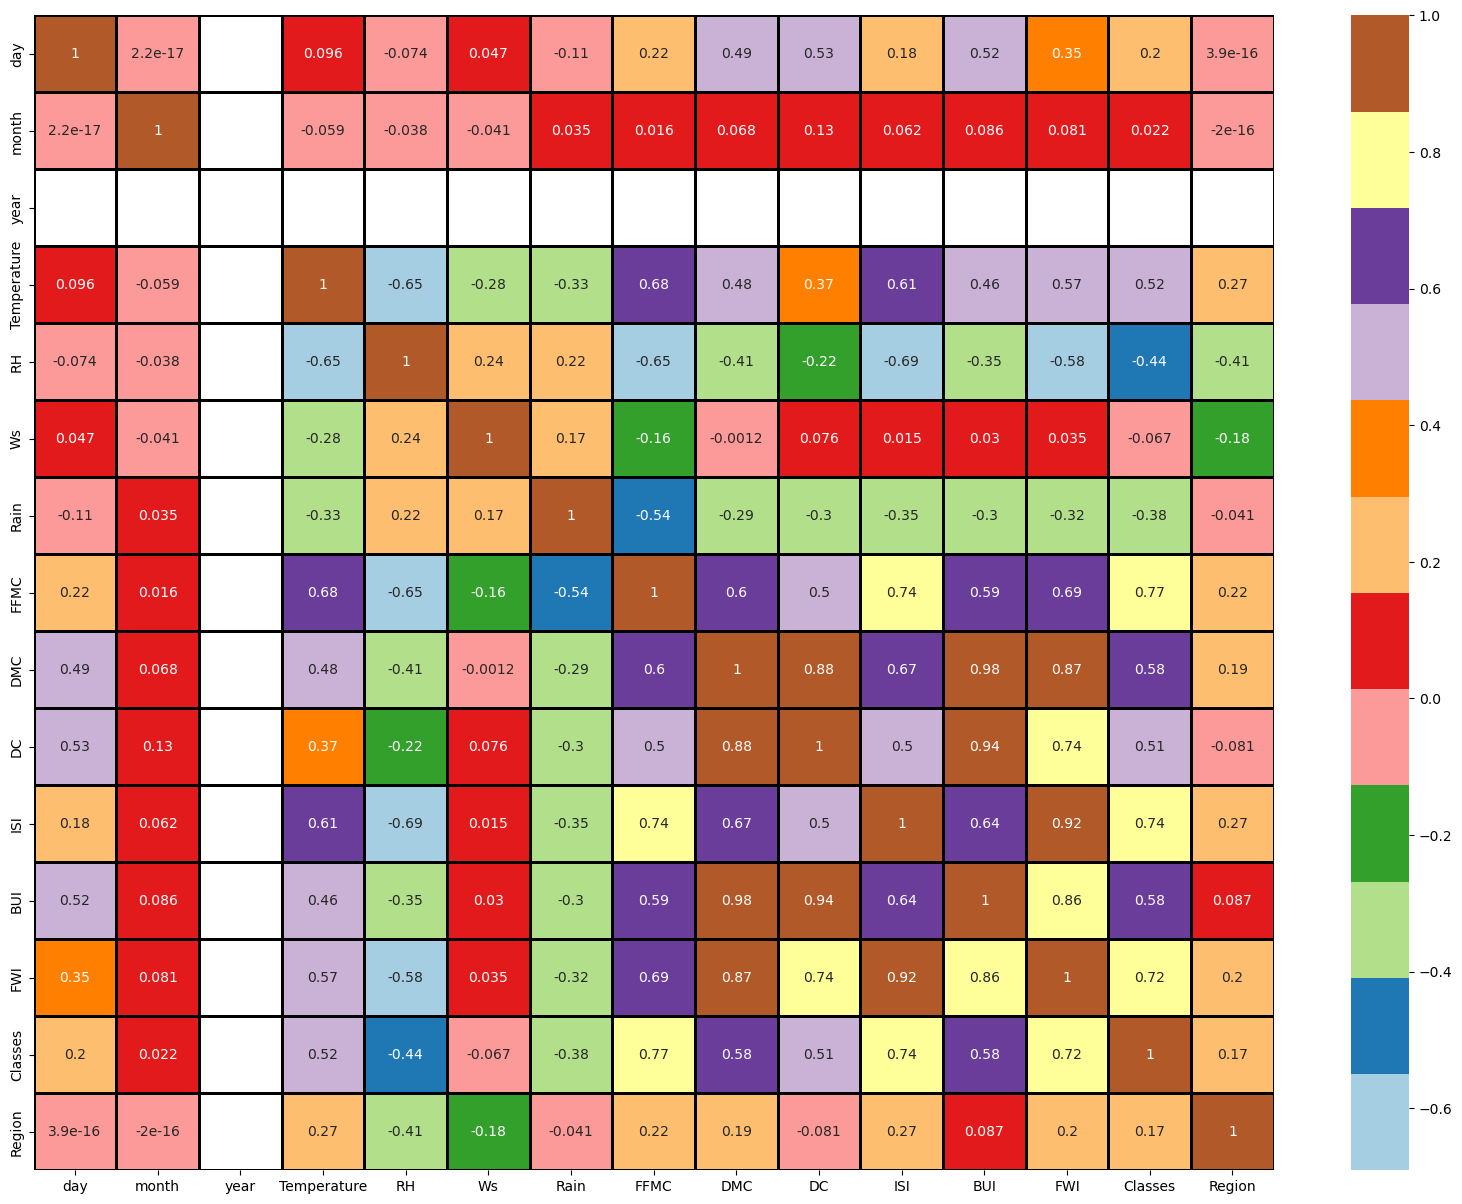

In [36]:
plt.figure(figsize=(20,15))
sns.heatmap(ff_df1.corr(), annot=True, linewidths=1,
           linecolor="black", cbar=True, cmap="Paired",
           xticklabels="auto", yticklabels="auto")

## Distribution visualisation

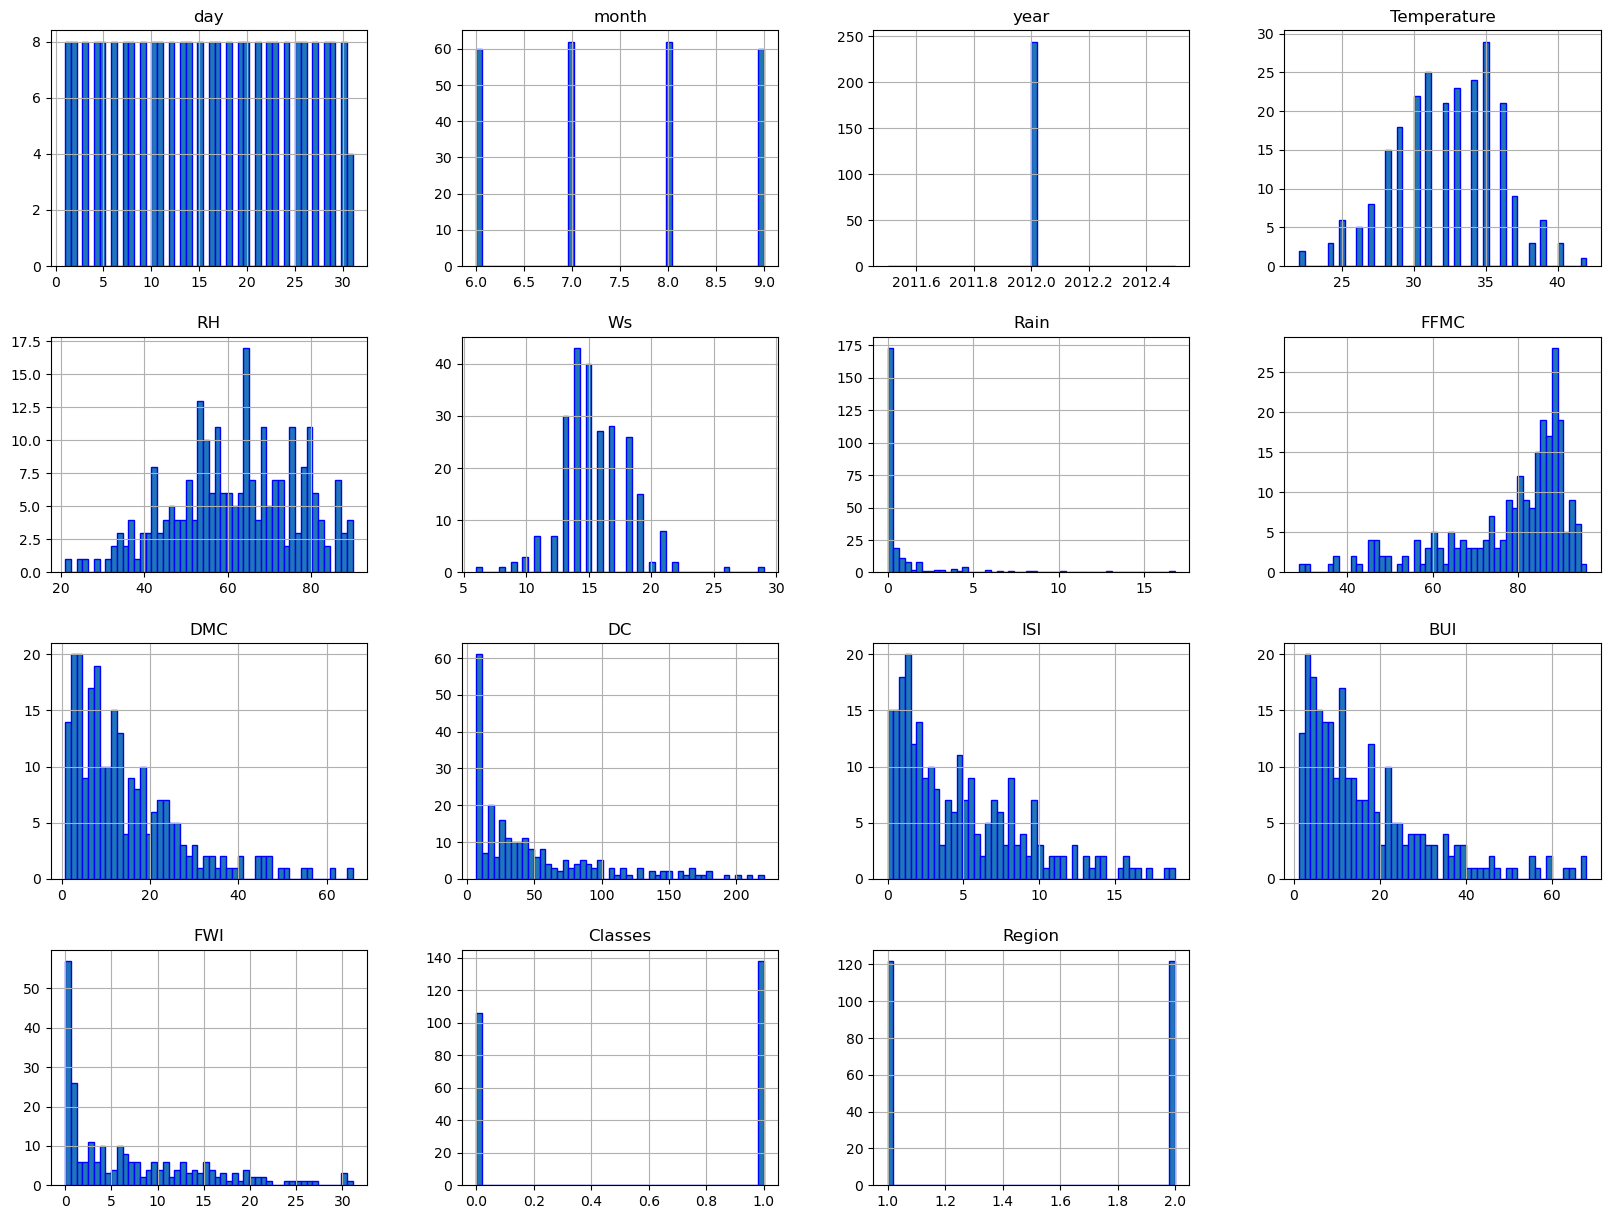

In [37]:
#Plotting density graphs for all features.
ff_df1.hist(bins=50, figsize=(20,15), ec ='b')
plt.show()

In [38]:
# Calculating the percentages of each Class categories
percent =ff_df1.Classes.value_counts(normalize=True)*100
percent

1    56.557377
0    43.442623
Name: Classes, dtype: float64

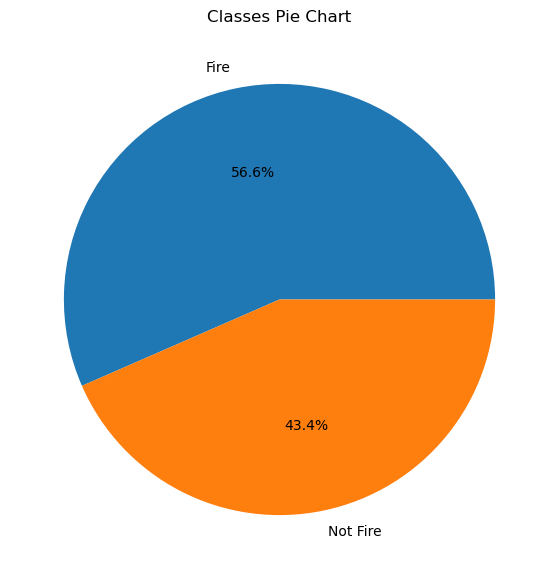

In [39]:
clabels =["Fire", "Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percent, labels = clabels, autopct='%1.1f%%')
plt.title("Classes Pie Chart", fontsize=12)
plt.show()

Text(0.5, 1.0, 'Class Distributions \n 0: No Fire || 1: Fire')

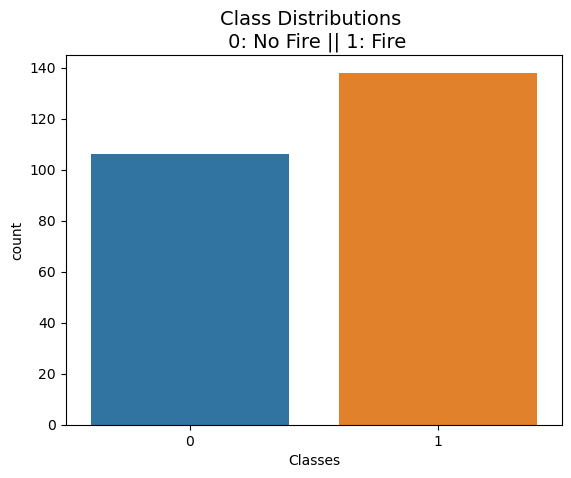

In [40]:
sns.countplot(x ='Classes', data=ff_df1, palette="tab10")
plt.title('Class Distributions \n 0: No Fire || 1: Fire', fontsize =14)


### Month-wise Fire Analysis

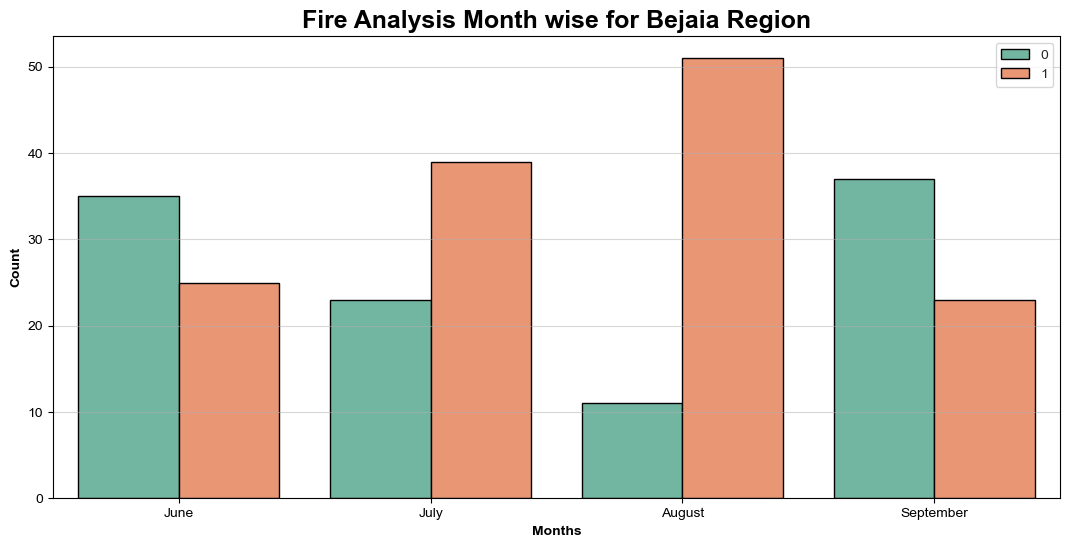

In [41]:
temp= ff_df1.loc[ff_df1['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= ff_df1,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

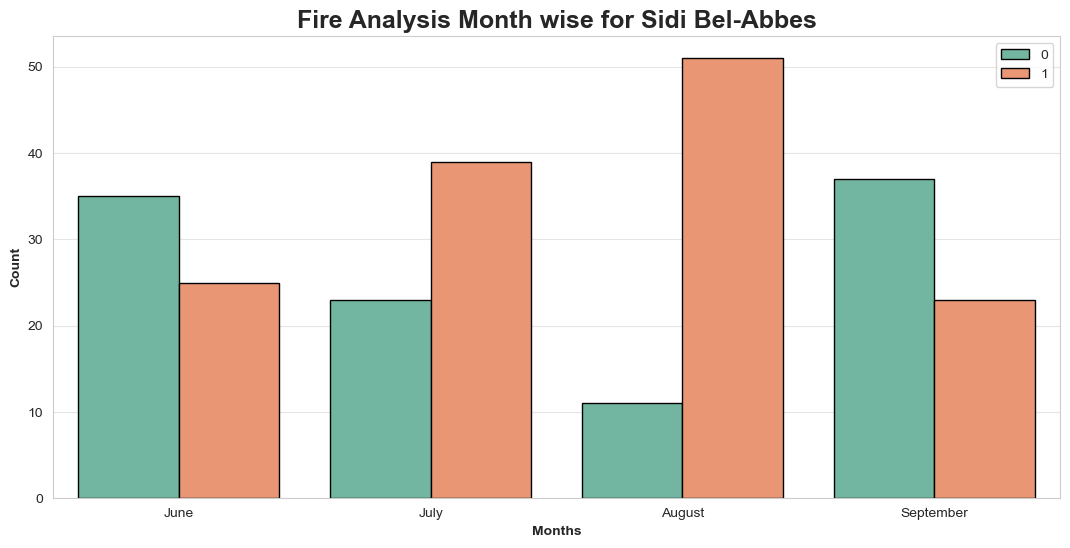

In [42]:
temp= ff_df1.loc[ff_df1['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= ff_df1,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi Bel-Abbes', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

- As observed from the count plots above, July and September seems to have the most number of forest fires for both regions.
- Most of the fires happened in August.
- Less fire in September.

### Weather System EDA

In [43]:
def barchart(features, xlabel):
    plt.figure(figsize=[14,8])
    by_ft= ff_df1.groupby([features], as_index=False)['Classes'].sum()
    ax =sns.barplot(x=features, y="Classes", data=by_ft[[features, 'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

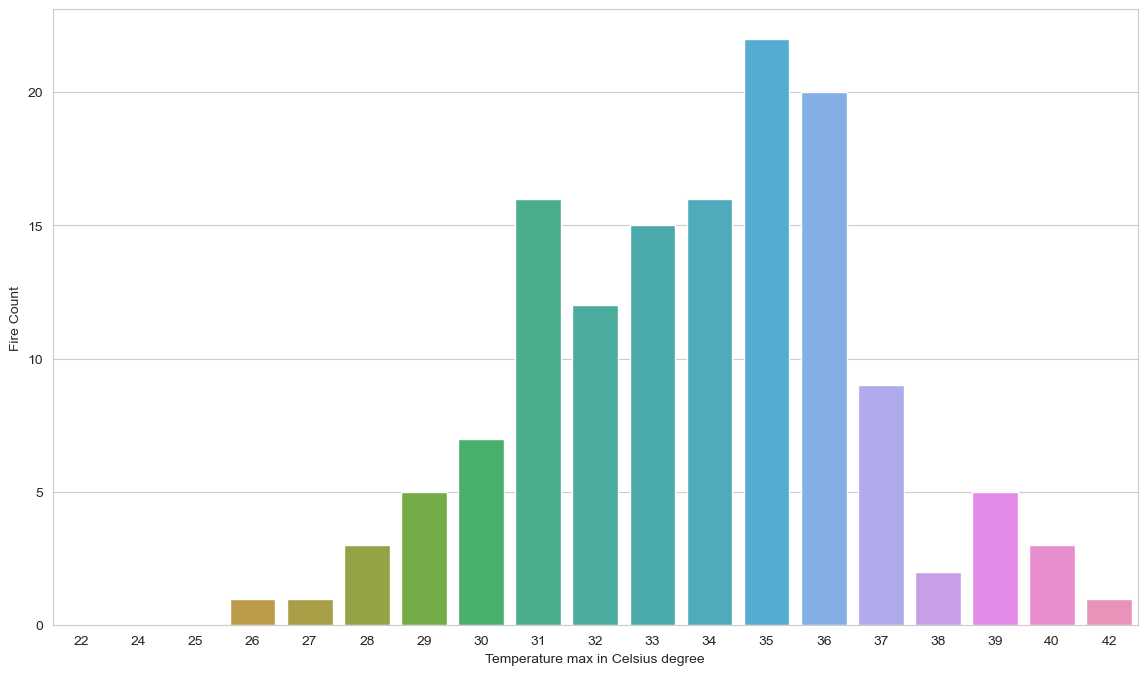

In [44]:
barchart('Temperature', 'Temperature max in Celsius degree')

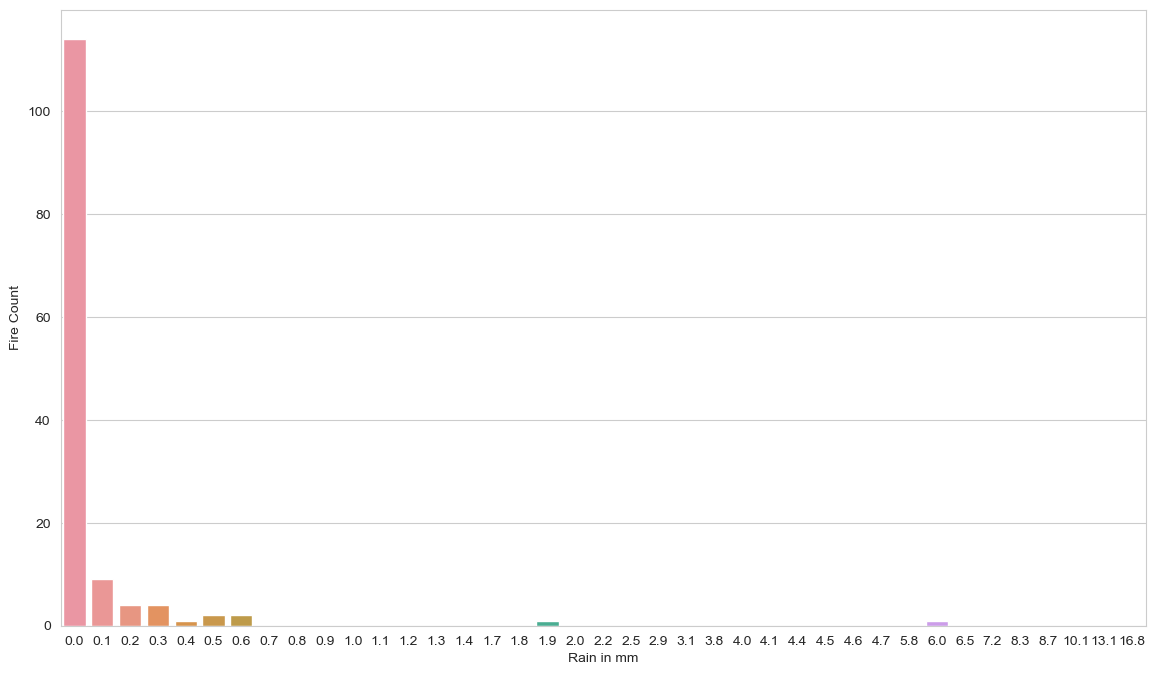

In [45]:
barchart('Rain', 'Rain in mm')

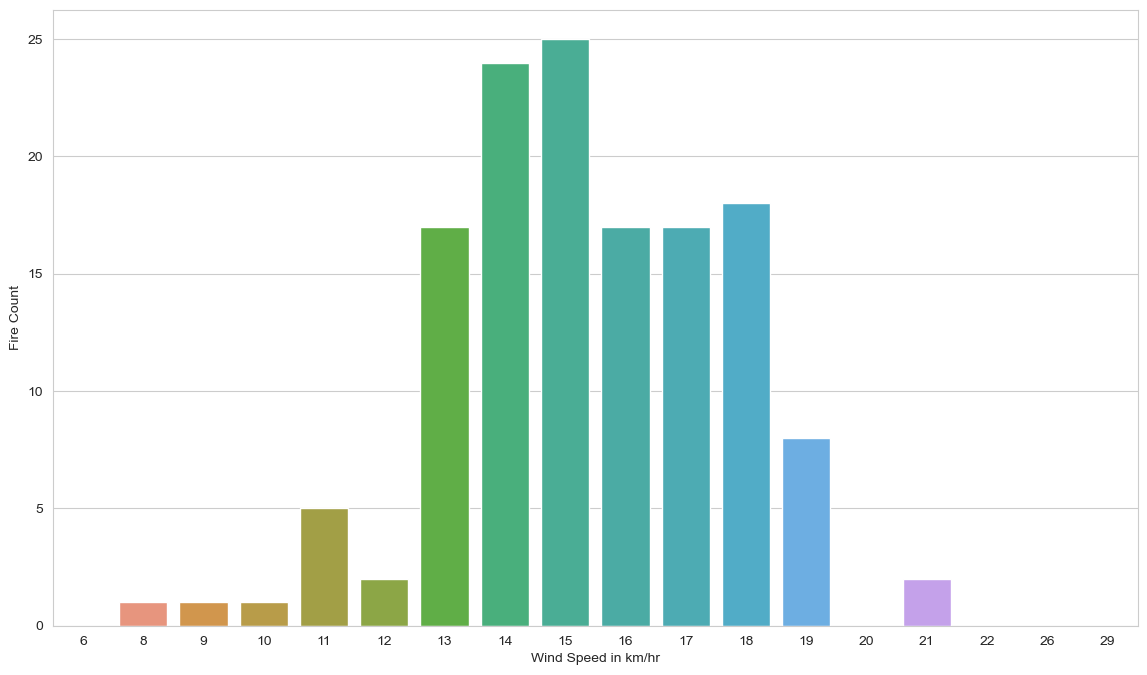

In [46]:
barchart('Ws', 'Wind Speed in km/hr')

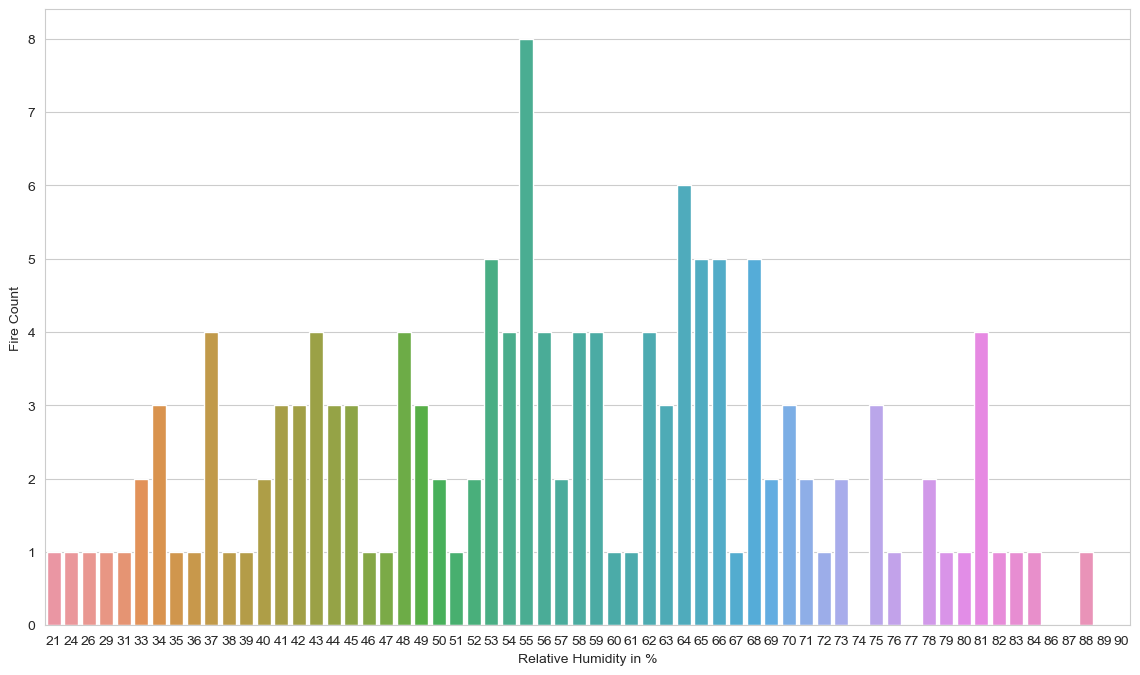

In [47]:
barchart('RH', 'Relative Humidity in %')

### FWI System Components EDA

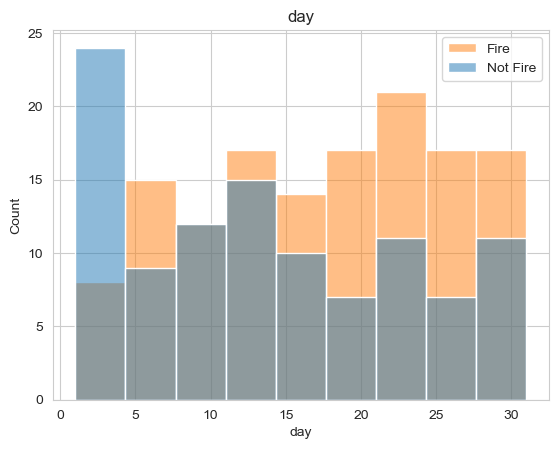

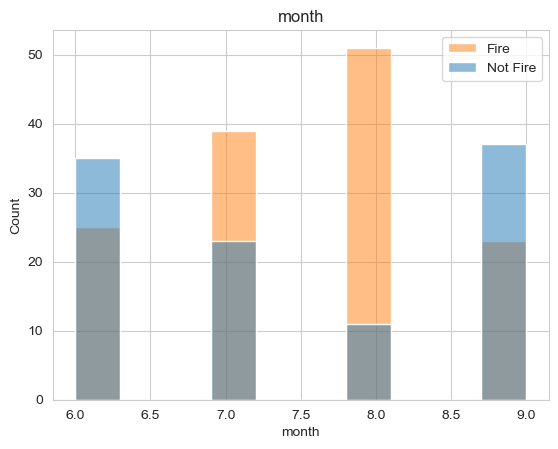

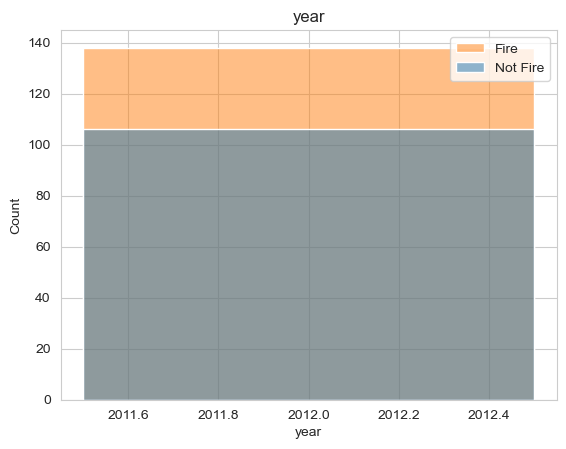

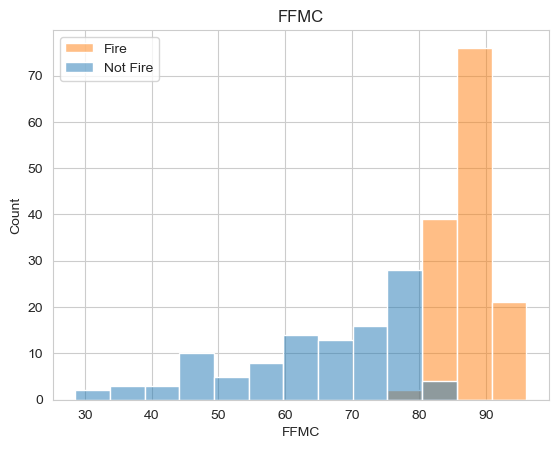

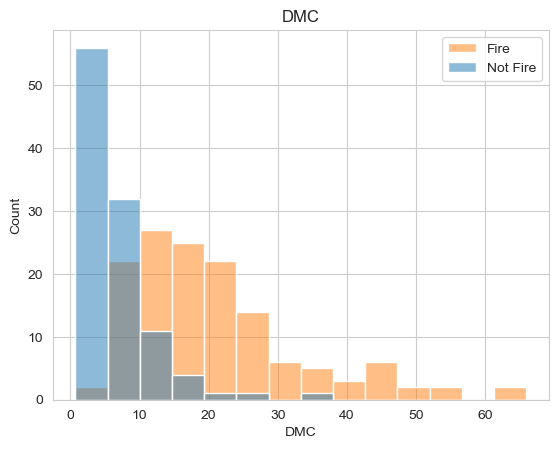

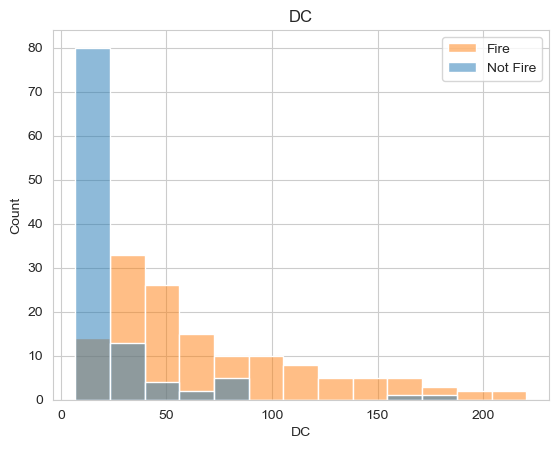

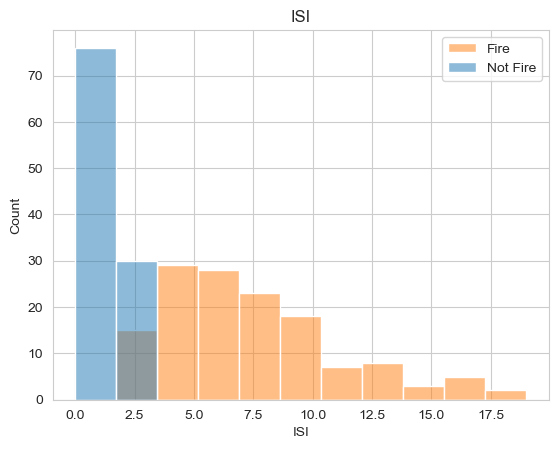

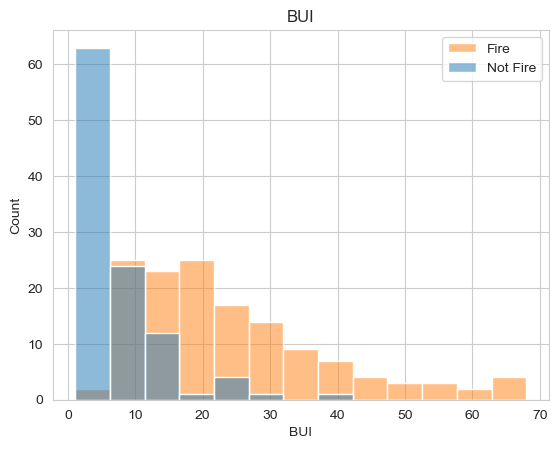

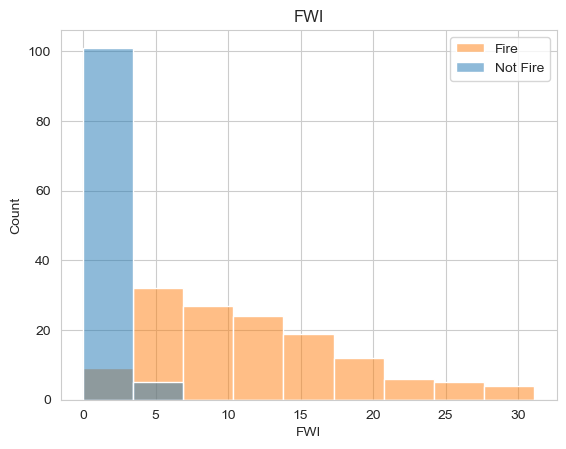

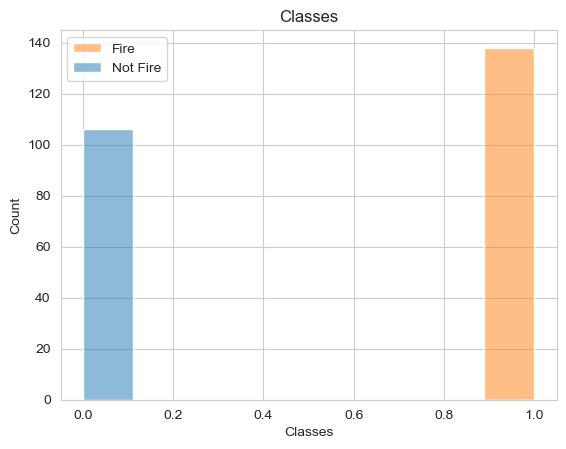

In [48]:
temp = temp = ff_df1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in temp:
    sns.histplot(data = temp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

## Report from EDA
### Weather system report: highest fire counts
- Temperature: 30-37 degree Celsius
- Rain: no rain to very less rain 0.0 to 0.3.
- Wind Speed: 13 to 19km/hr.
- Relative Humidity: 50% to 80%.

## FWI System component report: indexes that indicates higher chances of fire
- Fine Fuel Moisture code(FFMC): range from 28.6 to 92.5: above 75(Higher chances of fires)
- Duff Moisture Code(DMC): range 1.1 to 65.9: 1.1 to 10(Lower chance of fires)
- Initial Spread Index(ISI): range from 0 to 18: 0 to 3(Lower chance of fires)
- Buildup Index(BUI): range from 1.1 to 68: 1.1 to 10(Lower chance of fires)
- Fire Weather Index(FWI): ranges from 1 to 31.1: 0 to 3 (Lower chance of fires)

### Multicollinearity
- Multicollinearity is a statistical concept where independent variables modelled are correlated. If 2 variables are considered perfectly collinear, this suggests their correlation coefficient is +/-1.0.
- Result are less likely to be reliable statistical inferences.
- It can be detected with various techniques
- Regression analysis has the assumption that independent features should not have multicollinearity. Therefore, the independent variables need to have little correlation as much as possible .
- Variance Inflation Factor(VIF).
    - VIF value greater than 10 ---> Multicollinearity


In [49]:
x =ff_df1.iloc[:, 0:13]
y =ff_df1['Classes']

In [50]:
x.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [51]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Classes, dtype: int32

In [52]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_value = pd.DataFrame()
vif_value["feature"] =x.columns
vif_value["VIF"]= [variance_inflation_factor(x.values, i)
                                            for i in range(len(x.columns))]
print(vif_value)

        feature         VIF
0           day    1.483879
1         month    1.089123
2          year  516.122692
3   Temperature    2.425470
4            RH    2.796716
5            Ws    1.310188
6          Rain    1.551629
7          FFMC    4.115807
8           DMC   76.132753
9            DC   25.366641
10          ISI   23.128258
11          BUI  171.172429
12          FWI   40.311524


## Defining classes for the algorithms

In [53]:
ff_df2 =ff_df1.drop(['day','month','year'], axis=1)
ff_df2.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


# Algorithm Analysis

### Correlation

In [54]:
def corrlt(dataset, threshold):
    col_corr =set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])>threshold:
                colname =corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

### Scaling

In [55]:
def scaler_standard(xtrain, xtest):
    scaler = StandardScaler()
    xtrain_scale = scaler.fit_transform(xtrain)
    xtest_scale = scaler.transform(xtest)

    return xtrain_scale, xtest_scale

#### Splitting the dataset into train and test

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25,
                                                    random_state=0)
xtrain.shape, xtest.shape

((183, 13), (61, 13))

# Regression Problem algorithm:
* Prediction of the feature [FWI] (Fire Weather Index) which correlates to Classes Feature by 90%+

## Chosen model
### Random Forest Regressor
In these algorithm I have chosen to use the Random Forest Regressor model because it is versatile and performs well in various situations. Such as identifying important features or variables in the dataset by calculating feature importance's, which can be useful for feature selection and understanding the underlying relations in the dataset.

## Regression Analysis

In [57]:
x= ff_df2.iloc[:,0:10]
y= ff_df2['FWI']

In [58]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [59]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [60]:
xtrain.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI'],
      dtype='object')

In [61]:
xtrain.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,-0.007362,NaN,0.058354,-0.020929,0.055043,-0.103431,0.219356,0.500061,0.545876,0.148069,0.533027,0.338920
month,-0.007362,1.000000,NaN,-0.021620,-0.041261,-0.036510,0.022797,-0.007932,0.080922,0.138864,0.063950,0.099421,0.086974
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.058354,-0.021620,NaN,1.000000,-0.626397,-0.223805,-0.337218,0.674470,0.441474,0.327196,0.598864,0.413295,0.546774
RH,-0.020929,-0.041261,NaN,-0.626397,1.000000,0.193046,0.242255,-0.648065,-0.369303,-0.154480,-0.686348,-0.299767,-0.561505
Ws,0.055043,-0.036510,NaN,-0.223805,0.193046,1.000000,0.154463,-0.140206,0.053853,0.115697,0.065385,0.078398,0.091419
Rain,-0.103431,0.022797,NaN,-0.337218,0.242255,0.154463,1.000000,-0.538923,-0.291663,-0.293782,-0.337706,-0.299251,-0.323248
FFMC,0.219356,-0.007932,NaN,0.674470,-0.648065,-0.140206,-0.538923,1.000000,0.615337,0.501867,0.737919,0.594535,0.700703
DMC,0.500061,0.080922,NaN,0.441474,-0.369303,0.053853,-0.291663,0.615337,1.000000,0.872028,0.667145,0.982879,0.874822
DC,0.545876,0.138864,NaN,0.327196,-0.154480,0.115697,-0.293782,0.501867,0.872028,1.000000,0.467271,0.945337,0.717699


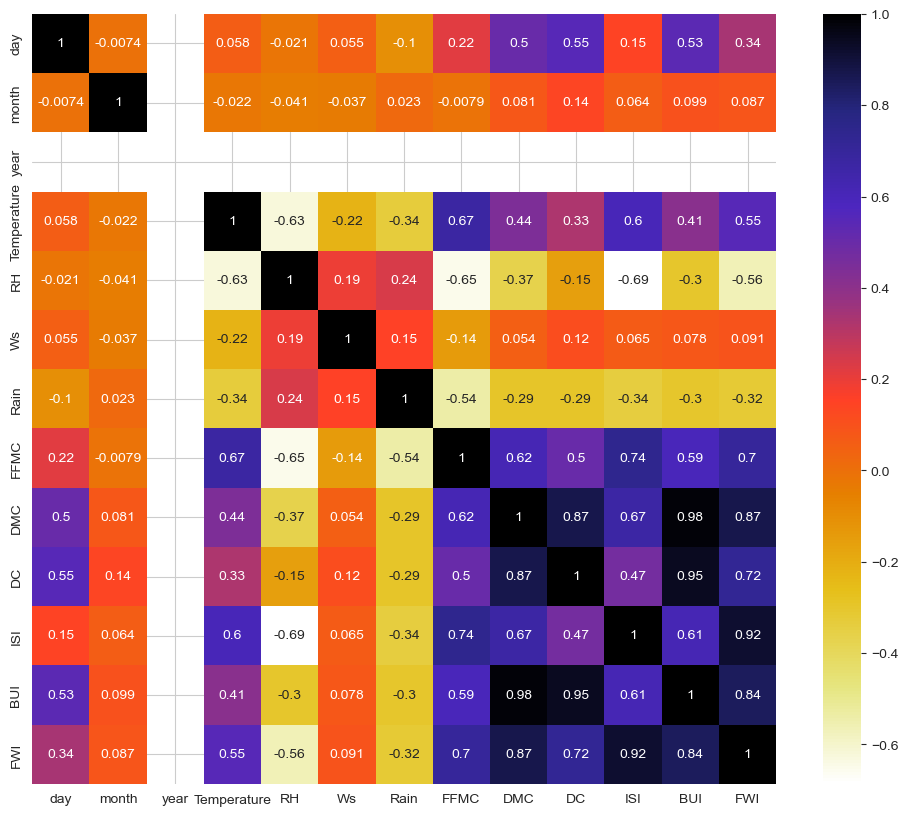

In [62]:
#Pearson correlation
plt.figure(figsize=(12,10))
correlate= xtrain.corr()
sns.heatmap(correlate, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### consider Correlation threshold value as 0.8


### Remove from the analysis any correlation for independent features and features with correlation >0.8
using the corrlt and scaler_standard functions.

In [63]:
corrlt_features = corrlt(xtrain, 0.8)
corrlt_features

{'BUI', 'DC', 'FWI'}

The features that are above the 0.8 threshold are 'BUI', 'DC', 'FWI'

In [64]:
xtrain.drop(corrlt_features, axis=1, inplace=True)
xtest.drop(corrlt_features, axis=1, inplace=True)
xtrain.shape, xtest.shape

((183, 10), (61, 10))

In [65]:
xtrain_scale, xtest_scale = scaler_standard(xtrain, xtest)

Text(0.5, 1.0, 'X_train After Scaling')

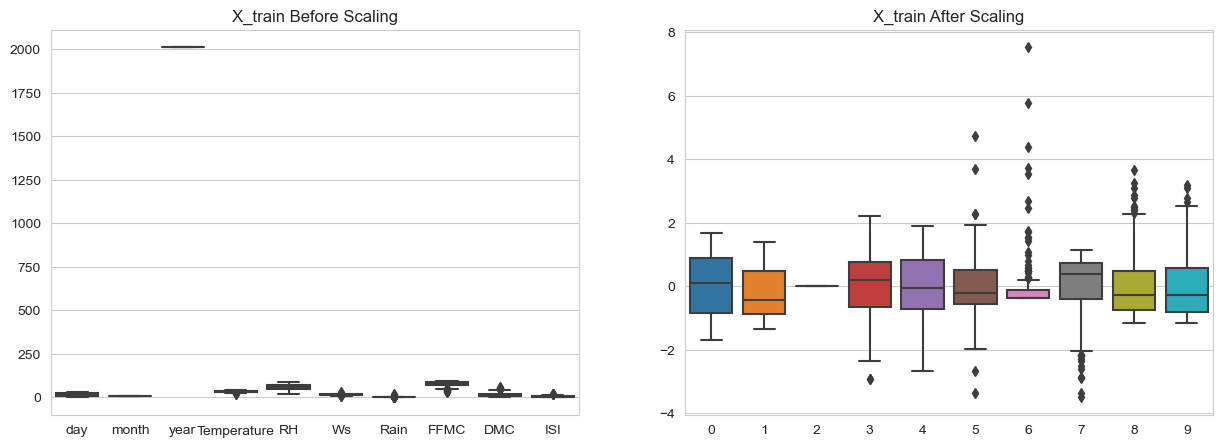

In [66]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data= xtrain)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data= xtrain_scale)
plt.title('X_train After Scaling')

## Model building for regression analysis

#### Linear Regression

In [67]:
LiReg = LinearRegression()
LiReg.fit(xtrain_scale, ytrain)
LiReg_pred = LiReg.predict(xtest_scale)
MAE = metrics.mean_absolute_error(ytest, LiReg_pred)
MSE = metrics.mean_squared_error(ytest, LiReg_pred)
r2 =r2_score(ytest, LiReg_pred)#Coefficient of determination

print("Linear Regressor")
print("Mean Absolute Error: {:.4f}".format(MAE))
print("Mean Squared Error: {:.4f}".format(MSE))
print("R-Square: {:.4f}".format(r2))

Linear Regressor
Mean Absolute Error: 0.2438
Mean Squared Error: 0.0881
R-Square: 0.6453


In [68]:
actual_pred = pd.DataFrame({'Actual Revenue: ':ytest, 'Predicted Revenue: ':LiReg_pred})
actual_pred

,Actual Revenue:,Predicted Revenue:
64,1,0.760040
63,0,0.358669
55,1,0.947745
111,1,0.861861
225,1,0.736636
92,0,-0.152509
76,1,0.424561
181,1,0.918047
188,0,0.177676
180,1,0.884929


##### Lasso Regression

In [69]:
#from sklearn.linear_model import Lasso
Lass_Reg = Lasso()
Lass_Reg.fit(xtrain_scale, ytrain)
LassReg_pred = Lass_Reg.predict(xtest_scale)
MAE = metrics.mean_absolute_error(ytest, LassReg_pred)
MSE = metrics.mean_squared_error(ytest, LassReg_pred)
r2= r2_score(ytest, LassReg_pred)

print("Lasso Regression")
print("Mean Absolute Error: {:.4f}".format(MAE))
print("Mean Squared Error: {:.4f}".format(MSE))
print("R-Square: {:.4f}".format(r2))

Lasso Regression
Mean Absolute Error: 0.4940
Mean Squared Error: 0.2494
R-Square: -0.0043


In [70]:
Actual_pred = pd.DataFrame({'Actual Revenue: ': ytest, 'Predicted Revenue': LassReg_pred})
Actual_pred

,Actual Revenue:,Predicted Revenue
64,1,0.57377
63,0,0.57377
55,1,0.57377
111,1,0.57377
225,1,0.57377
92,0,0.57377
76,1,0.57377
181,1,0.57377
188,0,0.57377
180,1,0.57377


##### Ridge Regression

In [71]:
#from sklearn.linear_model import Ridge

RReg = Ridge()
RReg.fit(xtrain_scale, ytrain)
RReg_Pred = RReg.predict(xtest_scale)
MAE = metrics.mean_absolute_error(ytest, RReg_Pred)
MSE = metrics.mean_squared_error(ytest, RReg_Pred)
r2 =  r2_score(ytest, RReg_Pred)

print("Ridge Regression")
print("Mean Absolute Error: {:.4f}".format(MAE))
print("Mean Squared Error: {:.4f}".format(MSE))
print("R-Square: {:.4f}".format(r2))

Ridge Regression
Mean Absolute Error: 0.2452
Mean Squared Error: 0.0881
R-Square: 0.6450


In [72]:
Actual_pred = pd.DataFrame({'Actual Revenue ': ytest, 'Predicted Revenue': RReg_Pred})
Actual_pred

,Actual Revenue,Predicted Revenue
64,1,0.754104
63,0,0.360681
55,1,0.945097
111,1,0.851389
225,1,0.729336
92,0,-0.152774
76,1,0.428233
181,1,0.916645
188,0,0.182027
180,1,0.881743


##### Support Vector Regressor

In [73]:
from sklearn.svm import SVR

SVector_Reg = SVR()
SVector_Reg.fit(xtrain_scale, ytrain)
SVector_Reg_Pred = SVector_Reg.predict(xtest_scale)
MAE = metrics.mean_absolute_error(ytest, SVector_Reg_Pred)
MSE = metrics.mean_squared_error(ytest, SVector_Reg_Pred)
r2 =  r2_score(ytest, SVector_Reg_Pred)

print("Support Vector Regressor")
print("Mean Absolute Error: {:.4f}".format(MAE))
print("Mean Squared Error: {:.4f}".format(MSE))
print("R-Square: {:.4f}".format(r2))

Support Vector Regressor
Mean Absolute Error: 0.1900
Mean Squared Error: 0.0687
R-Square: 0.7233


In [74]:
Actual_predict = pd.DataFrame({'Actual Revenue ': ytest, 'Predicted Revenue': SVector_Reg_Pred})
Actual_predict

,Actual Revenue,Predicted Revenue
64,1,0.670585
63,0,0.049357
55,1,0.938183
111,1,0.735231
225,1,0.712971
92,0,0.098002
76,1,0.286204
181,1,0.999030
188,0,0.128044
180,1,1.030600


##### Random Forest Regressor

In [75]:
RforestReg = RandomForestRegressor()
RforestReg.fit(xtrain_scale, ytrain)
forestReg_Pred = RforestReg.predict(xtest_scale)
MAE = metrics.mean_absolute_error(ytest, forestReg_Pred)
MSE = metrics.mean_squared_error(ytest, forestReg_Pred)
r2 =  r2_score(ytest, forestReg_Pred)

print("Random Forest Regressor")
print("Mean Absolute Error: {:.4f}".format(MAE))
print("Mean Squared Error: {:.4f}".format(MSE))
print("R-Square: {:.4f}".format(r2))

Random Forest Regressor
Mean Absolute Error: 0.0284
Mean Squared Error: 0.0099
R-Square: 0.9601


In [76]:
Actual_predict = pd.DataFrame({'Actual Revenue ': ytest, 'Predicted Revenue': forestReg_Pred})
Actual_predict

,Actual Revenue,Predicted Revenue
64,1,1.00
63,0,0.00
55,1,1.00
111,1,0.99
225,1,1.00
92,0,0.00
76,1,0.54
181,1,1.00
188,0,0.00
180,1,1.00


### K_Neighbors Regressor

In [77]:
#from sklearn.neighbors import KNeighborsRegressor

K_NReg = KNeighborsRegressor()
K_NReg.fit(xtrain_scale, ytrain)
K_NReg_Pred = K_NReg.predict(xtest_scale)
MAE = metrics.mean_absolute_error(ytest, K_NReg_Pred)
MSE = metrics.mean_squared_error(ytest, K_NReg_Pred)
r2 =  r2_score(ytest, K_NReg_Pred)

print("K-Neighbor Regressor")
print("Mean Absolute Error: {:.4f}".format(MAE))
print("Mean Squared Error: {:.4f}".format(MSE))
print("R-Square: {:.4f}".format(r2))

K-Neighbor Regressor
Mean Absolute Error: 0.1738
Mean Squared Error: 0.0767
R-Square: 0.6910


In [78]:
Actual_pred = pd.DataFrame({'Actual Revenue ': ytest, 'Predicted Revenue': K_NReg_Pred})
Actual_pred

,Actual Revenue,Predicted Revenue
64,1,0.8
63,0,0.4
55,1,1.0
111,1,0.4
225,1,0.8
92,0,0.0
76,1,0.6
181,1,1.0
188,0,0.0
180,1,1.0


### r2 Score Results Summary

In [79]:
print("      Models                 Score  ")
print("Random Forest Regressor      95.15% ")
print("Support Vector regressor     72.33% ")
print("K-Neighbors Regressor        69.10% ")
print("Linear Regressor             64.53% ")
print("Ridge Regressor              64.50% ")
print("Lasso Regressor              -0.43% ")

      Models                 Score  
Random Forest Regressor      95.15% 
Support Vector regressor     72.33% 
K-Neighbors Regressor        69.10% 
Linear Regressor             64.53% 
Ridge Regressor              64.50% 
Lasso Regressor              -0.43% 


Random Forest regressor has performed best out of all the models

## Hyperparameter Tuning
#### Tuning Random Forest Regressor

In [80]:
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

forestReg = RandomForestRegressor()
Rand_rf = RandomizedSearchCV(forestReg, param_grid, cv = 10, verbose=2,n_jobs = -1)
Rand_rf.fit(xtrain_scale, ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [81]:
BestRand_grid = Rand_rf.best_estimator_

bestref_pred = BestRand_grid.predict(xtest_scale)
bestref_pred
MAE = metrics.mean_absolute_error(ytest, bestref_pred)
MSE = metrics.mean_squared_error(ytest, bestref_pred)
reg2 =  r2_score(ytest, K_NReg_Pred)

print("Random Forest Tuned")
print("Mean Absolute Error: {:.4f}".format(MAE))
print("Mean Squared Error: {:.4f}".format(MSE))
print("R-Square: {:.4f}".format(r2))

Random Forest Tuned
Mean Absolute Error: 0.0335
Mean Squared Error: 0.0132
R-Square: 0.6910


## Selecting Features
- Only selecting 5 important features to make the prediction
    - #### ISI, FFMC, DMC, RH, and Ws as seen in the output below.

In [82]:
important_features = Rand_rf.best_estimator_.feature_importances_
important_df = pd.DataFrame({
    'feature': xtrain.columns,
    'importance': important_features
}).sort_values('importance', ascending=False)
important_df

,feature,importance
9,ISI,0.579174
7,FFMC,0.420283
4,RH,0.000325
8,DMC,0.000176
0,day,0.000043
1,month,0.000000
2,year,0.000000
3,Temperature,0.000000
5,Ws,0.000000
6,Rain,0.000000


Text(0, 0.5, 'Features')

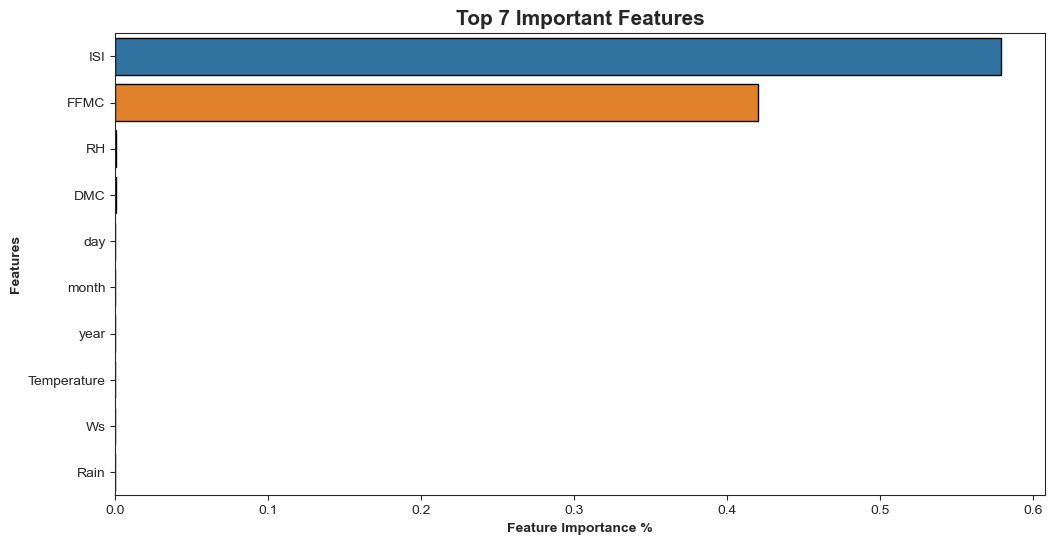

In [83]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=important_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 7 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

## Deployment Model

In [84]:
xtrain_new = xtrain.drop(['Rain', 'RH'], axis=1)
xtest_new = xtest.drop(['Rain', 'RH'], axis=1)

In [85]:
xtrain_new.columns

Index(['day', 'month', 'year', 'Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [86]:
xtest_new.columns

Index(['day', 'month', 'year', 'Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [87]:
xtrain_new_scale, xtest_new_scale = scaler_standard(xtrain_new, xtest_new)


In [88]:
BestRand_grid.fit(xtrain_new_scale, ytrain)
bestref_pred = BestRand_grid.predict(xtest_new_scale)
MAE = metrics.mean_absolute_error(ytest, bestref_pred)
MSE = metrics.mean_squared_error(ytest, bestref_pred)
reg2 =  r2_score(ytest, K_NReg_Pred)

print("Random Forest Tuned")
print("Mean Absolute Error: {:.4f}".format(MAE))
print("Mean Squared Error: {:.4f}".format(MSE))
print("R-Square: {:.4f}".format(r2))

Random Forest Tuned
Mean Absolute Error: 0.0343
Mean Squared Error: 0.0131
R-Square: 0.6910


In [89]:
#import bz2,pickle
file = bz2.BZ2File('Regression.pkl','wb')
pickle.dump(BestRand_grid,file)
file.close()


# Classification Algorithm:
* Binary classification [(fire, not fire)] by predicting the features ["Classes"] from dataset

## XGboost Classifier.
* In these algorithm I choose to use the XGboost Classifier because of its high performance, scalability and ability to handle a variety of data types. It will also implement the gradient boosting algorithm that ensemble weak models while minimising prediction errors. It also provides a more generalised solution and over-fitting prevention as it has a regularisation techniques. It also increases model performances as it offers parallel training and in built cross-validation methods.

### Classification Analysis

In [90]:
ff_df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


#### Splitting dataset into inout and output feature

In [91]:
x= ff_df2.iloc[:, 0:10]
y= ff_df2['Classes']

In [92]:
x.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [93]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Classes, dtype: int32

In [94]:
# separate dataset into train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4, random_state=0)
xtrain.shape, xtest.shape

((146, 10), (98, 10))

In [95]:
xtrain.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [96]:
corrlt_features = corrlt(xtrain, 0.8)
corrlt_features

{'BUI', 'DC', 'FWI'}

In [97]:
xtrain.drop(corrlt_features,axis=1, inplace=True)
xtest.drop(corrlt_features,axis=1, inplace=True)
xtrain.shape, xtest.shape

((146, 7), (98, 7))

In [98]:
xtrain_scale, xtest_scale = scaler_standard(xtrain, xtest)

#### Logistic Regression

In [99]:
LReg =LogisticRegression()
LReg.fit(xtrain_scale, ytrain)
LReg_Pred = LReg.predict(xtest_scale)
Score = accuracy_score(ytest, LReg_Pred)
CReport = classification_report(ytest, LReg_Pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(Score))
print (CReport)

Logistic Regression
Accuracy Score value: 0.9490
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        49
           1       0.94      0.96      0.95        49

    accuracy                           0.95        98
   macro avg       0.95      0.95      0.95        98
weighted avg       0.95      0.95      0.95        98



In [100]:
Actual_pred = pd.DataFrame({'Actual Revenue': ytest, 'Predicted Revenue': LReg_Pred})
Actual_pred

,Actual Revenue,Predicted Revenue
64,1,1
63,0,0
55,1,1
111,1,1
225,1,1
92,0,0
76,1,0
181,1,1
188,0,0
180,1,1


##### Metrics
- Precision: Ratio of true +ve to sum of true and false +ve

- Recall: Ratio of true +ve to sum of true +ve and false -ve

- F1 Score: Weighted harmonic mean of precision and recall.
the close the value is to 1.0 the better the expected performance of a model.

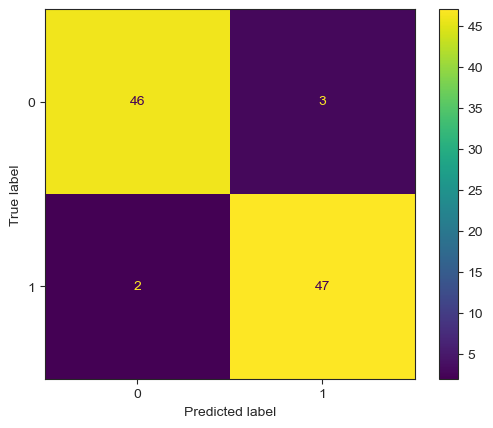

In [101]:
LReg_ConfMatrix = ConfusionMatrixDisplay.from_estimator(LReg, xtest_scale, ytest)
LReg_ConfMatrix

##### Decision Tree

In [102]:
DT_Classifier = DecisionTreeClassifier()
DT_Classifier.fit(xtrain_scale, ytrain)
DT_Classifier_pred = DT_Classifier.predict(xtest_scale)
Score = accuracy_score(ytest, DT_Classifier_pred)
CReport = classification_report(ytest, DT_Classifier_pred)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(Score))
print (CReport)

Decision Tree
Accuracy Score value: 0.9898
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.98      1.00      0.99        49

    accuracy                           0.99        98
   macro avg       0.99      0.99      0.99        98
weighted avg       0.99      0.99      0.99        98



In [103]:
Actual_pred = pd.DataFrame({'Actual Revenue': ytest, 'Predicted Revenue': DT_Classifier_pred})
Actual_pred

,Actual Revenue,Predicted Revenue
64,1,1
63,0,0
55,1,1
111,1,1
225,1,1
92,0,0
76,1,1
181,1,1
188,0,0
180,1,1


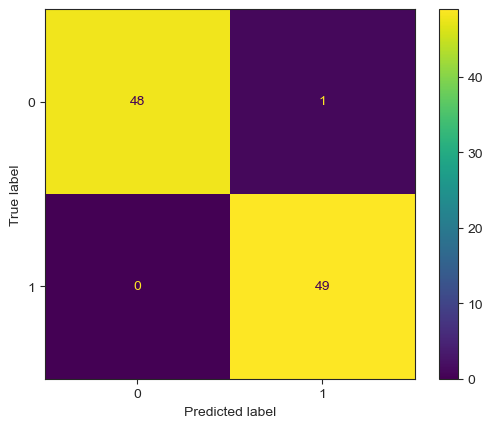

In [104]:
DT_Classifier_ConfMatrix = ConfusionMatrixDisplay.from_estimator(DT_Classifier, xtest_scale, ytest)
DT_Classifier_ConfMatrix

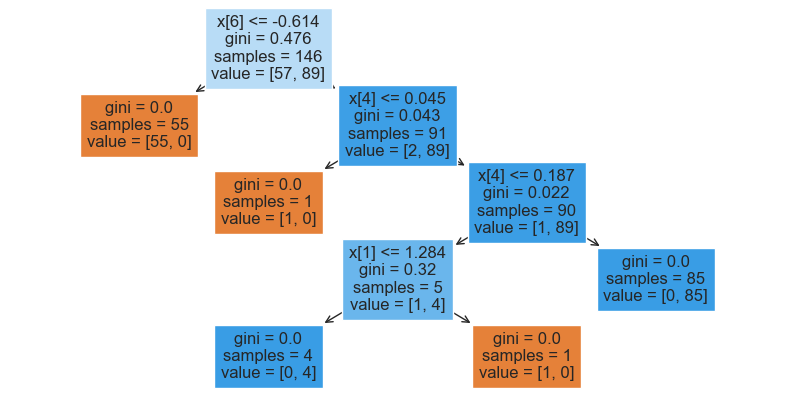

In [105]:
plt.figure(figsize = (10,5))
tree.plot_tree(DT_Classifier,filled = True)
plt.show()

### Random Forest Classifier

In [106]:
#from sklearn.ensemble import RandomForestClassifier

RF_Classifier = RandomForestClassifier()
RF_Classifier.fit(xtrain_scale, ytrain)
RF_Classifier_pred = RF_Classifier.predict(xtest_scale)
RF_Classifier_pred
Score = accuracy_score(ytest, RF_Classifier_pred)
CReport = classification_report(ytest, RF_Classifier_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (CReport)

Random Forest
Accuracy Score value: 0.9694
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        49
           1       0.94      1.00      0.97        49

    accuracy                           0.97        98
   macro avg       0.97      0.97      0.97        98
weighted avg       0.97      0.97      0.97        98



In [107]:
Actual_pred = pd.DataFrame({'Actual Revenue': ytest, 'Predicted Revenue': RF_Classifier_pred})
Actual_pred

,Actual Revenue,Predicted Revenue
64,1,1
63,0,0
55,1,1
111,1,1
225,1,1
92,0,0
76,1,1
181,1,1
188,0,0
180,1,1


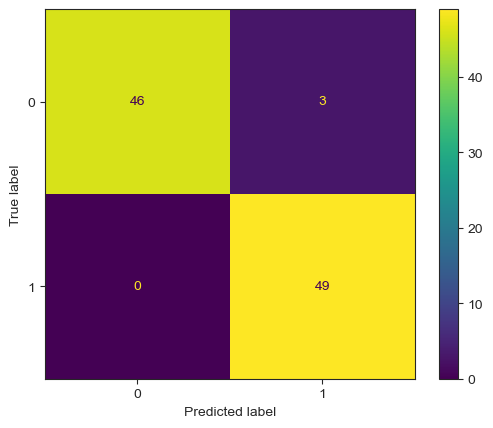

In [108]:
RF_Classifier_ConfMatrix = ConfusionMatrixDisplay.from_estimator(RF_Classifier, xtest_scale, ytest)
RF_Classifier_ConfMatrix

### K_Neighbors Classifier

In [109]:
# KNeighborsClassifier to Train from SKlearn
K_NClassifier = KNeighborsClassifier()
K_NClassifier.fit(xtrain_scale, ytrain)
K_NClassifier_pred = K_NClassifier.predict(xtest_scale)
K_NClassifier_pred
Score = accuracy_score(ytest, K_NClassifier_pred)
CReport = classification_report(ytest, K_NClassifier_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (CReport)

Random Forest
Accuracy Score value: 0.9082
              precision    recall  f1-score   support

           0       0.98      0.84      0.90        49
           1       0.86      0.98      0.91        49

    accuracy                           0.91        98
   macro avg       0.92      0.91      0.91        98
weighted avg       0.92      0.91      0.91        98



In [110]:
Actual_pred = pd.DataFrame({'Actual Revenue': ytest, 'Predicted Revenue': K_NClassifier_pred})
Actual_pred

,Actual Revenue,Predicted Revenue
64,1,1
63,0,0
55,1,1
111,1,1
225,1,1
92,0,0
76,1,1
181,1,1
188,0,0
180,1,1


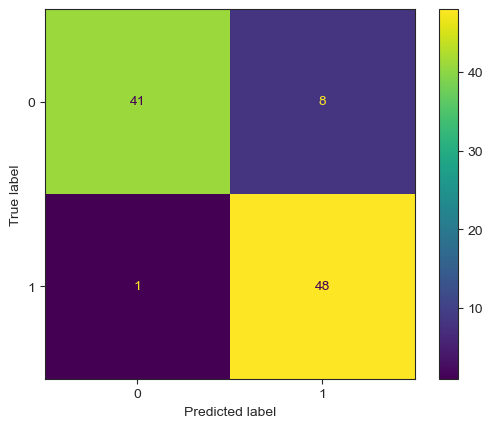

In [111]:
K_NClassifier_ConfMatrix = ConfusionMatrixDisplay.from_estimator(K_NClassifier, xtest_scale, ytest)
K_NClassifier_ConfMatrix

## XGb Model

In [112]:
xgb = XGBClassifier()
xgb.fit(xtrain_scale, ytrain)
xgb_pred = xgb.predict(xtest_scale)
xgb_pred
Score = accuracy_score(ytest, xgb_pred)
CReport = classification_report(ytest, xgb_pred)

print("XGBoost Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (CReport)

XGBoost Classifier
Accuracy Score value: 0.9694
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        49
           1       0.94      1.00      0.97        49

    accuracy                           0.97        98
   macro avg       0.97      0.97      0.97        98
weighted avg       0.97      0.97      0.97        98



In [113]:
Actual_pred = pd.DataFrame({'Actual Revenue': ytest, 'Predicted Revenue': xgb_pred})
Actual_pred

,Actual Revenue,Predicted Revenue
64,1,1
63,0,0
55,1,1
111,1,1
225,1,1
92,0,0
76,1,1
181,1,1
188,0,0
180,1,1


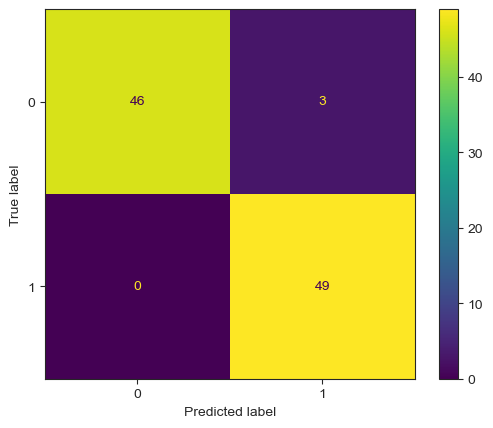

In [114]:
xgb_cm = ConfusionMatrixDisplay.from_estimator(xgb, xtest_scale, ytest)

# HyperParameter Tuning

#### XGb classifier tuning

In [115]:
params={
 "learning_rate"    : (np.linspace(0,10, 100)) ,
 "max_depth"        : (np.linspace(1,50, 25,dtype=int)),
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]}
Rand_xgb = RandomizedSearchCV(xgb, params, cv = 10, n_jobs = -1)
Rand_xgb.fit(xtrain_scale, ytrain).best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.1111111111111112,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [116]:
Bst_xgb = Rand_xgb.best_estimator_
Bst_xgb.score(xtest_scale, ytest)
Bstxgb_pred = Bst_xgb.predict(xtest_scale)
Score = accuracy_score(ytest, Bstxgb_pred)
CReport = classification_report(ytest, Bstxgb_pred)
print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(Score))
print (CReport)

FINAL XGB
Accuracy Score value: 0.9694
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        49
           1       0.94      1.00      0.97        49

    accuracy                           0.97        98
   macro avg       0.97      0.97      0.97        98
weighted avg       0.97      0.97      0.97        98



In [117]:
Actual_pred = pd.DataFrame({'Actual Revenue': ytest, 'Predicted Revenue': Bstxgb_pred})
Actual_pred

,Actual Revenue,Predicted Revenue
64,1,1
63,0,0
55,1,1
111,1,1
225,1,1
92,0,0
76,1,1
181,1,1
188,0,0
180,1,1


#### Forest Classifier Tuning

In [118]:
params = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
rf = RandomizedSearchCV(RF_Classifier, params, cv = 10,n_jobs = -1)
rf.fit(xtrain_scale, ytrain).best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='auto',
                       min_samples_leaf=9, min_samples_split=4,
                       n_estimators=90)

In [119]:
Bst_rf = rf.best_estimator_
Bst_rf.score(xtest_scale, ytest)

0.9897959183673469

In [120]:
Bstrf_pred = Bst_rf.predict(xtest_scale)
Bstrf_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [121]:
Actual_pred = pd.DataFrame({'Actual Revenue': ytest, 'Predicted Revenue': Bstrf_pred})
Actual_pred

,Actual Revenue,Predicted Revenue
64,1,1
63,0,0
55,1,1
111,1,1
225,1,1
92,0,0
76,1,1
181,1,1
188,0,0
180,1,1


# Model Selection


## Stratified K-fold Cross-validation(CV)
- This ensures the feature interest needed for the training and test set have the same proportion as the original dataset.
- Needed for good accuracy without error.

In [122]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 0)

In [123]:
cv_xgb= cross_val_score(Bst_xgb, x, y, cv=skfold, scoring='accuracy').mean()
print('CV Score XGB Tuned {:.4f}'.format(cv_xgb))

CV Score XGB Tuned 0.9713


In [124]:
cv_rf =cross_val_score(RF_Classifier, x, y, cv=skfold, scoring="accuracy").mean()
print('CV Score Random Forest {:.4f}'.format(cv_rf))

CV Score Random Forest 0.9757


In [125]:
cv_dt =cross_val_score(DT_Classifier, x, y, cv= skfold, scoring="accuracy").mean()
print('CV Score Decision Tree {:.4f}'.format(cv_dt))

CV Score Decision Tree 0.9757


In [126]:
cv_knn =cross_val_score(K_NClassifier, x, y, cv=skfold, scoring="accuracy").mean()
print('CV Score KNN Classifier {:.4f}'.format(cv_knn))

CV Score KNN Classifier 0.9013


In [127]:
cv_lg =cross_val_score(LReg, x, y, cv=skfold, scoring="accuracy").mean()
print('CV Score Logistic Regression {:.4f}'.format(cv_lg))

CV Score Logistic Regression 0.9632


XGboost Classifier has the better result.

###  Model Deployment Feature Selection

In [128]:
important_features =    Rand_xgb.best_estimator_.feature_importances_
important_df = pd.DataFrame({
    'feature': xtrain.columns,
    'importance': important_features
}).sort_values('importance', ascending=False)
important_df

,feature,importance
6,ISI,0.988335
0,Temperature,0.011665
1,RH,0.000000
2,Ws,0.000000
3,Rain,0.000000
4,FFMC,0.000000
5,DMC,0.000000


Text(0, 0.5, 'Features')

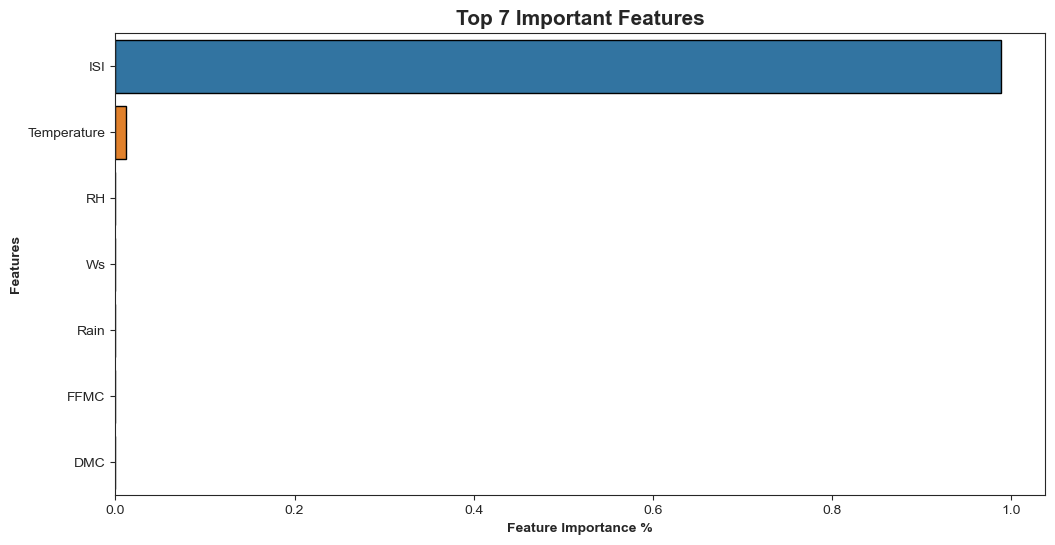

In [129]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=important_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 7 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

# Model Deployment

In [130]:
xtrain.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [131]:
xtrain_new = xtrain.drop(['Rain', 'RH'], axis=1)
xtest_new = xtest.drop(['Rain', 'RH'], axis=1)

In [132]:
xtrain_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [133]:
xtest_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [134]:
xtrain_new_scale, xtest_new_scale = scaler_standard(xtrain_new, xtest_new)

In [135]:
xgb_model =Rand_xgb.fit(xtrain_new_scale, ytrain).best_estimator_
xgb_model.score(xtest_new_scale, ytest)
xgb_model_pred = xgb_model.predict(xtest_new_scale)
Score = accuracy_score(ytest, xgb_model_pred)
CReport = classification_report(ytest, xgb_model_pred)
print("Final Model XGB")
print ("Accuracy Score value: {:.4f}".format(Score))
print (CReport)

Final Model XGB
Accuracy Score value: 0.9694
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        49
           1       0.94      1.00      0.97        49

    accuracy                           0.97        98
   macro avg       0.97      0.97      0.97        98
weighted avg       0.97      0.97      0.97        98



In [136]:
Actual_pred = pd.DataFrame({'Actual Revenue': ytest, 'Predicted Revenue': xgb_model_pred})
Actual_pred

,Actual Revenue,Predicted Revenue
64,1,1
63,0,0
55,1,1
111,1,1
225,1,1
92,0,0
76,1,1
181,1,1
188,0,0
180,1,1


In [137]:
#import bz2,pickle
file = bz2.BZ2File('Classification.pkl','wb')
pickle.dump(xgb_model, file)
file.close()

# Conclusion
- Based on the results and the implementation of the algorithm, the prediction can only be used to calculate if fire could possibly occur at a location based on the inputs collected.
- Both algorithms classification and regression were deployed and completed.

# References
1. Faroudja ABID et al. , â€œPredicting Forest Fire in Algeria using Data Mining Techniques: Case Study of the Decision Tree Algorithmâ€, International Conference on Advanced Intelligent Systems for Sustainable Development (AI2SD 2019) , 08 - 11 July , 2019, Marrakech, Morocco.
2. https://github.com/ashishrana1501/Forest-Fire-Prediction